In [1]:
import pandas as pd
import numpy as np 
import os
import random

from datetime import datetime, timedelta

from bs4 import BeautifulSoup

pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 50000)

C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-live-trading\U7622216_20230207.htm
C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-live-trading\U7622216_20230207.htm
C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-live-trading\U7622216_20230209.htm
C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-live-trading\U7622216_20230209.htm
C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-live-trading\U7622216_20230210.htm
C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-live-trading\U7622216_20230210.htm


,account,contract,date/time,settle_date,exchange,type,quantity,price,notional value,commision,fee,code
0,U7622216,MNQH3,"2023-02-10, 10:00:00",2023-02-13,-,BUY,1,"12,350.0000","-24,700.00",-0.62,0.00,C
1,U7622216,MNQH3,"2023-02-10, 10:07:12",2023-02-13,-,BUY,1,"12,313.0000","-24,626.00",-0.62,0.00,C
2,U7622216,MNQH3,"2023-02-10, 11:16:12",2023-02-13,-,BUY,1,"12,338.7500","-24,677.50",-0.62,0.00,C
3,U7622216,MNQH3,"2023-02-10, 11:42:13",2023-02-13,-,BUY,1,"12,319.2500","-24,638.50",-0.62,0.00,C
4,U7622216,MNQH3,"2023-02-10, 11:44:23",2023-02-13,-,BUY,1,"12,317.7500","-24,635.50",-0.62,0.00,C
5,U7622216,MNQH3,"2023-02-10, 11:57:04",2023-02-13,-,BUY,1,"12,303.5000","-24,607.00",-0.62,0.00,C
6,U7622216,MNQH3,"2023-02-10, 12:12:08",2023-02-13,-,BUY,1,"12,266.7500","-24,533.50",-0.62,0.00,C
7,U7622216,MNQH3,"2023-02-10, 09:59:04",2023-02-13,-,SELL,-1,"12,338.2500","24,676.50",-0.62,0.00,O
8,U7622216,MNQH3,"2023-02-10, 10:07:03",2023-02-13,-,SELL,-1,"12,301.7500","24,603.50",-0.62,0.00,O
9,U7622216,MNQH3,"2023-02-10, 11:16:06",2023-02-13,-,SELL,-1,"12,336.5000","24,673.00",-0.62,0.00,O


,account,contract,settle_date,exchange,type,quantity,price,notional value,commision,fee,code,date,time
datetime,,,,,,,,,,,,,
2023-02-10 11:16:12,U7622216,MNQH3,2023-02-13,-,BUY,1.0,12338.75,"-24,677.50",-0.62,0.00,C,2023-02-10,11:16:12
2023-02-10 11:42:13,U7622216,MNQH3,2023-02-13,-,BUY,1.0,12319.25,"-24,638.50",-0.62,0.00,C,2023-02-10,11:42:13
2023-02-10 11:44:23,U7622216,MNQH3,2023-02-13,-,BUY,1.0,12317.75,"-24,635.50",-0.62,0.00,C,2023-02-10,11:44:23
2023-02-10 11:57:04,U7622216,MNQH3,2023-02-13,-,BUY,1.0,12303.50,"-24,607.00",-0.62,0.00,C,2023-02-10,11:57:04
2023-02-10 12:12:08,U7622216,MNQH3,2023-02-13,-,BUY,1.0,12266.75,"-24,533.50",-0.62,0.00,C,2023-02-10,12:12:08


,account,contract,settle_date,exchange,type,quantity,price,notional value,commision,fee,code,date,time
datetime,,,,,,,,,,,,,
2023-02-10 11:16:06,U7622216,MNQH3,2023-02-13,-,SELL,-1.0,12336.50,"24,673.00",-0.62,0.00,O,2023-02-10,11:16:06
2023-02-10 11:39:03,U7622216,MNQH3,2023-02-13,-,SELL,-1.0,12315.00,"24,630.00",-0.62,0.00,O,2023-02-10,11:39:03
2023-02-10 11:44:07,U7622216,MNQH3,2023-02-13,-,SELL,-1.0,12315.75,"24,631.50",-0.62,0.00,O,2023-02-10,11:44:07
2023-02-10 11:57:03,U7622216,MNQH3,2023-02-13,-,SELL,-1.0,12302.00,"24,604.00",-0.62,0.00,O,2023-02-10,11:57:03
2023-02-10 12:12:04,U7622216,MNQH3,2023-02-13,-,SELL,-1.0,12263.50,"24,527.00",-0.62,0.00,O,2023-02-10,12:12:04


C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-live-trading\U7622216_20230220_20230227.htm
C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-live-trading\U7622216_20230220_20230227.htm


C:\Users\ianaz\AppData\Local\Temp/ipykernel_22912/318338306.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_o['pnl'] = data_pnl * 2


,account,contract,date/time,settle_date,exchange,type,quantity,price,notional value,commision,fee,code
0,U7622216,MESH3,"2023-02-21, 15:59:34",2023-02-22,-,BUY,1,"4,005.7500","-20,028.75",-0.62,0.00,C
1,U7622216,MESH3,"2023-02-23, 15:30:55",2023-02-24,-,BUY,1,"4,024.5000","-20,122.50",-0.62,0.00,O
2,U7622216,MESH3,"2023-02-24, 15:59:41",2023-02-27,-,BUY,1,"3,975.0000","-19,875.00",-0.62,0.00,C
3,U7622216,MESH3,"2023-02-21, 13:30:37",2023-02-22,-,SELL,-1,"4,014.0000","20,070.00",-0.62,0.00,O
4,U7622216,MESH3,"2023-02-23, 15:59:37",2023-02-24,-,SELL,-1,"4,018.2500","20,091.25",-0.62,0.00,C
5,U7622216,MESH3,"2023-02-24, 13:30:02",2023-02-27,-,SELL,-1,"3,962.2500","19,811.25",-0.62,0.00,O
6,U7622216,MNQH3,"2023-02-21, 11:16:56",2023-02-22,-,BUY,1,"12,177.2500","-24,354.50",-0.62,0.00,C
7,U7622216,MNQH3,"2023-02-21, 11:23:05",2023-02-22,-,BUY,1,"12,171.5000","-24,343.00",-0.62,0.00,C
8,U7622216,MNQH3,"2023-02-21, 11:48:04",2023-02-22,-,BUY,1,"12,170.5000","-24,341.00",-0.62,0.00,O
9,U7622216,MNQH3,"2023-02-21, 11:59:34",2023-02-22,-,BUY,1,"12,155.5000","-24,311.00",-0.62,0.00,C


,account,contract,settle_date,exchange,type,quantity,price,notional value,commision,fee,code,date,time
datetime,,,,,,,,,,,,,
2023-02-27 11:57:04,U7622216,MNQH3,2023-02-28,-,BUY,1.0,12106.50,"-24,213.00",-0.62,0.00,O,2023-02-27,11:57:04
2023-02-27 14:40:27,U7622216,MNQH3,2023-02-28,-,BUY,1.0,12105.75,"-24,211.50",-0.62,0.00,C,2023-02-27,14:40:27
2023-02-27 15:28:34,U7622216,MNQH3,2023-02-28,-,BUY,1.0,12081.25,"-24,162.50",-0.62,0.00,C,2023-02-27,15:28:34
2023-02-27 15:30:17,U7622216,MNQH3,2023-02-28,-,BUY,1.0,12086.25,"-24,172.50",-0.62,0.00,C,2023-02-27,15:30:17
2023-02-27 15:30:22,U7622216,MNQH3,2023-02-28,-,BUY,1.0,12076.75,"-24,153.50",-0.62,0.00,O,2023-02-27,15:30:22


,account,contract,settle_date,exchange,type,quantity,price,notional value,commision,fee,code,date,time
datetime,,,,,,,,,,,,,
2023-02-27 12:02:12,U7622216,MNQH3,2023-02-28,-,SELL,-1.0,12087.00,"24,174.00",-0.62,0.00,C,2023-02-27,12:02:12
2023-02-27 14:38:04,U7622216,MNQH3,2023-02-28,-,SELL,-1.0,12110.75,"24,221.50",-0.62,0.00,O,2023-02-27,14:38:04
2023-02-27 15:21:04,U7622216,MNQH3,2023-02-28,-,SELL,-1.0,12073.75,"24,147.50",-0.62,0.00,O,2023-02-27,15:21:04
2023-02-27 15:29:04,U7622216,MNQH3,2023-02-28,-,SELL,-1.0,12079.50,"24,159.00",-0.62,0.00,O,2023-02-27,15:29:04
2023-02-27 15:31:16,U7622216,MNQH3,2023-02-28,-,SELL,-1.0,12081.25,"24,162.50",-0.62,0.00,C,2023-02-27,15:31:16


C:\Users\ianaz\AppData\Local\Temp/ipykernel_22912/318338306.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_o['pnl'] = data_pnl * 2


<AxesSubplot:>

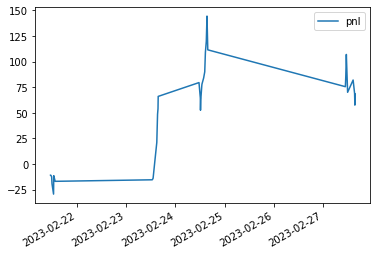

In [10]:
path = r'C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-live-trading'
htm = ''



pnl_paths = []
for file in os.listdir(path):
    pnl_paths.append(os.path.join(path, file))  # all csv file in this
    


df_pnl = pd.DataFrame(columns=['pnl'])
for p in pnl_paths:
    print(p)
    page = open(p, encoding="utf8")

    soup = BeautifulSoup(page)
    tr = soup.find_all( class_ = "row-summary" )

    tr_list = []
    for i in tr:
        td = i.find_all('td')

        td_list = []
        for j in td:
            text = j.get_text()

            
            td_list.append(text)
        tr_list.append(td_list)

    data = pd.DataFrame(tr_list, columns=['account', 'contract', 'date/time', 'settle_date', 'exchange', 'type', 'quantity', 
                                        'price', 'notional value', 'commision', 'fee', 'code'])

    print(p)
    
    test = data[data['contract'] == 'MNQH3']

    if len(test) >= 1:
        display(data)
        data = data[data['contract'] == 'MNQH3']
        data['date'] = [i[:10] for i in data['date/time']]
        data['time'] = [i[12:] for i in data['date/time']]
        data.drop(columns=['date/time'], inplace=True)
        data['datetime'] = data['date'] + ' ' +data['time'] 
        data.set_index('datetime', inplace=True)

        data.index = pd.to_datetime(data.index)
        data.sort_index(inplace=True)
        float_list = ['price', 'commision', 'quantity']


        for i in float_list:
            data[i] = [i.replace(',', '') for i in data[i]]
            data[i] = data[i].astype('float')


        data_o = data[data['code'] == 'O']
        data_c = data[data['code'] == 'C']
        data_buy = data[data['type'] == 'BUY']
        data_sell = data[data['type'] == 'SELL']

        display(data_buy.tail(), data_sell.tail())
        data_pnl = (data_sell['price'].values - data_buy['price'].values)

        data_o['pnl'] = data_pnl * 2
        data_o = data_o[['pnl']]

        df_pnl = df_pnl.append(data_o)
        
    else:
        pass


# df_whole = pd.read_csv('df_pnl.csv')
# df_whole.set_index('Unnamed: 0', inplace=True)
# df_whole.index = pd.to_datetime(df_whole.index)

# df_whole = df_whole.append(df_pnl)

df_pnl = df_pnl.between_time('9:30','16:00')
df_pnl = df_pnl['2023-02-21':]
df_pnl.cumsum().plot()


In [6]:
df_pnl.resample('d').sum()

,pnl
2023-02-10,-72.5
2023-02-11,0.0
2023-02-12,0.0
2023-02-13,0.0
2023-02-14,0.0
2023-02-15,0.0
2023-02-16,0.0
2023-02-17,0.0
2023-02-18,0.0
2023-02-19,0.0


In [27]:
df_pnl

,pnl
2023-02-10 09:59:04,-235.0
2023-02-10 10:07:03,-225.0
2023-02-10 11:16:06,-45.0
2023-02-10 11:39:03,-85.0
2023-02-10 11:44:07,-40.0
2023-02-10 11:57:03,-30.0
2023-02-10 12:12:04,-65.0
2023-02-21 11:16:03,-130.0
2023-02-21 11:23:04,-20.0
2023-02-21 11:48:04,-35.0


In [15]:
df_whole

,pnl
2023-02-06 09:46:03,-390.000000
2023-02-06 09:51:07,-30.000000
2023-02-06 10:07:03,15.000000
2023-02-06 10:37:04,-40.000000
2023-02-06 11:54:04,110.000000
2023-02-06 13:07:03,180.000000
2023-02-06 13:35:04,-50.000000
2023-02-06 13:40:08,-40.000000
2023-02-06 13:47:04,-15.000000
2023-02-06 14:59:03,-75.000000
